In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('assgmt01_student_performance_dataset.csv')

# Inspect the dataset
print("Data Info:")
print(data.info())
print("Data Head:")
print(data.head())

# Calculate summary statistics
summary_stats = data.describe().T  # Transpose for easier readability
summary_stats['mode'] = data.mode().iloc[0]  # Adding mode (first mode if there are multiple)
summary_stats = summary_stats[['mean', 'mode', 'min', 'max', 'std']]

print("Summary Statistics for Each Feature:")
print(summary_stats)

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)




Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   study_hours_per_week           496 non-null    float64
 1   attendance_rate                497 non-null    float64
 2   previous_exam_scores           498 non-null    float64
 3   assignments_completed          496 non-null    float64
 4   extracurricular_participation  498 non-null    float64
 5   study_attendance_interaction   495 non-null    float64
 6   study_hours_per_week_squared   499 non-null    float64
 7   attendance_rate_squared        497 non-null    float64
 8   assignments_per_week           500 non-null    float64
 9   final_exam_score               500 non-null    float64
dtypes: float64(10)
memory usage: 39.2 KB
None
Data Head:
   study_hours_per_week  attendance_rate  previous_exam_scores  \
0                  11.0            96.73

In [37]:
# Fill missing values based on specified rules
# 1. Fill using mode
for column in ['study_hours_per_week', 'assignments_completed', 'extracurricular_participation']:
    data[column].fillna(data[column].mode()[0], inplace=True)

# 2. Fill using mean
for column in ['attendance_rate', 'previous_exam_scores']:
    data[column].fillna(data[column].mean(), inplace=True)

# 3. Fill study_attendance_interaction by multiplying study_hours_per_week and attendance_rate
data['study_attendance_interaction'].fillna(
    data['study_hours_per_week'] * data['attendance_rate'], inplace=True
)

# 4. Fill study_hours_per_week_squared by squaring study_hours_per_week
data['study_hours_per_week_squared'].fillna(
    data['study_hours_per_week'] ** 2, inplace=True
)

# 5. Fill attendance_rate_squared by squaring attendance_rate
data['attendance_rate_squared'].fillna(
    data['attendance_rate'] ** 2, inplace=True
)

# Display the dataset to verify that missing values have been handled
print("Missing values after handling:")
print(data.isnull().sum())
print(data.head())


Missing values after handling:
study_hours_per_week             0
attendance_rate                  0
previous_exam_scores             0
assignments_completed            0
extracurricular_participation    0
study_attendance_interaction     0
study_hours_per_week_squared     0
attendance_rate_squared          0
assignments_per_week             0
final_exam_score                 0
dtype: int64
   study_hours_per_week  attendance_rate  previous_exam_scores  \
0                  11.0        96.730000                 46.86   
1                  24.0        81.910000                 64.87   
2                  19.0        75.830000                 91.81   
3                  15.0        82.860000                 95.38   
4                  12.0        75.409618                 67.94   

   assignments_completed  extracurricular_participation  \
0                   11.0                            1.0   
1                   18.0                            0.0   
2                   13.0        

In [38]:
# Scale the features
features_to_scale = data.drop(columns=['final_exam_score'])  # Assuming 'final_exam_score' is the target variable
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Convert scaled features back to a DataFrame and add the target variable
scaled_data = pd.DataFrame(scaled_features, columns=features_to_scale.columns)
scaled_data['final_exam_score'] = data['final_exam_score']

# Display the scaled data
print("Scaled Data:")
print(scaled_data.head())

Scaled Data:
   study_hours_per_week  attendance_rate  previous_exam_scores  \
0             -0.802461     1.516455e+00             -1.380651   
1              0.823980     4.623528e-01             -0.356407   
2              0.198426     2.990054e-02              1.175694   
3             -0.302018     5.299235e-01              1.378723   
4             -0.677350     1.010776e-15             -0.181813   

   assignments_completed  extracurricular_participation  \
0               0.203759                      -0.952363   
1               1.357733                      -1.543892   
2               0.533466                      -0.952363   
3              -1.115068                      -1.543892   
4               0.368612                       0.822226   

   study_attendance_interaction  study_hours_per_week_squared  \
0                     -0.389974                     -0.880647   
1                      1.028266                      0.734705   
2                      0.202642         

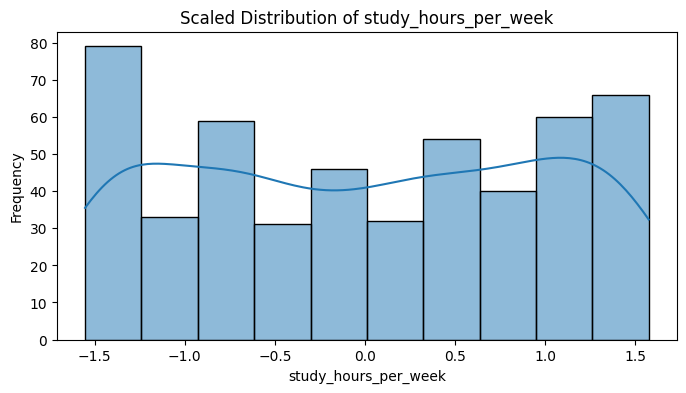

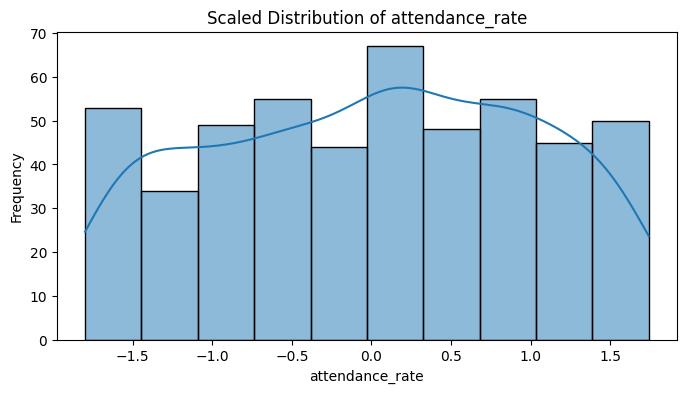

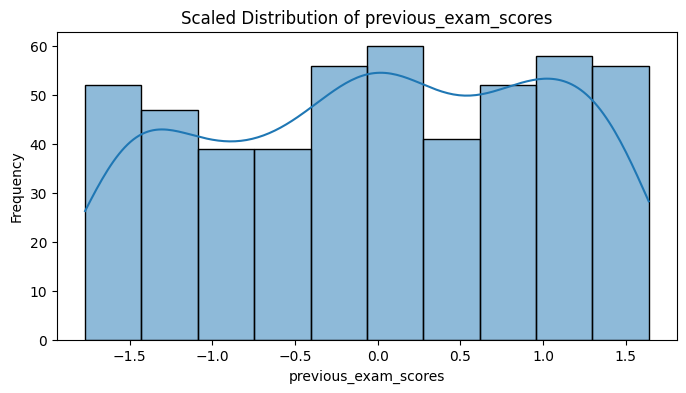

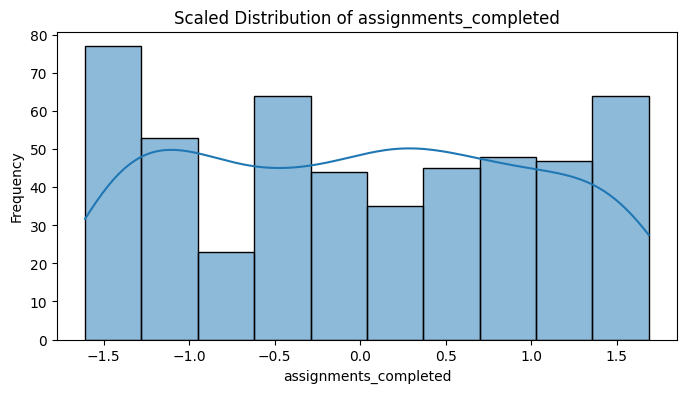

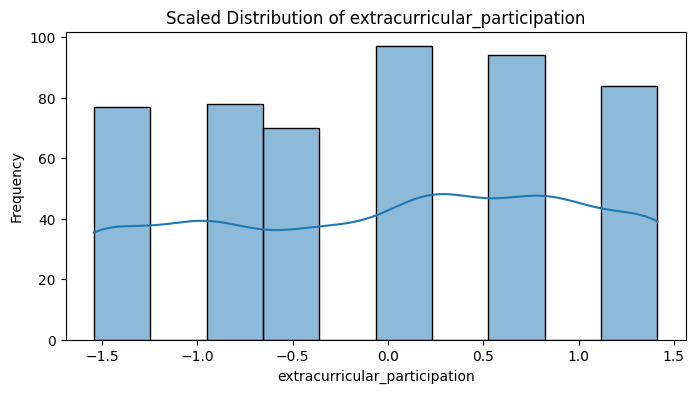

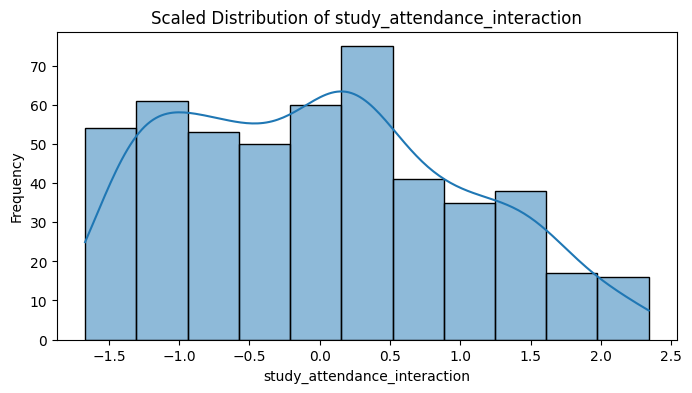

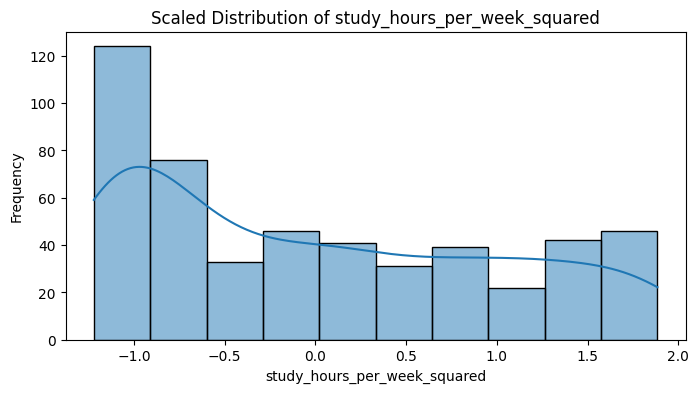

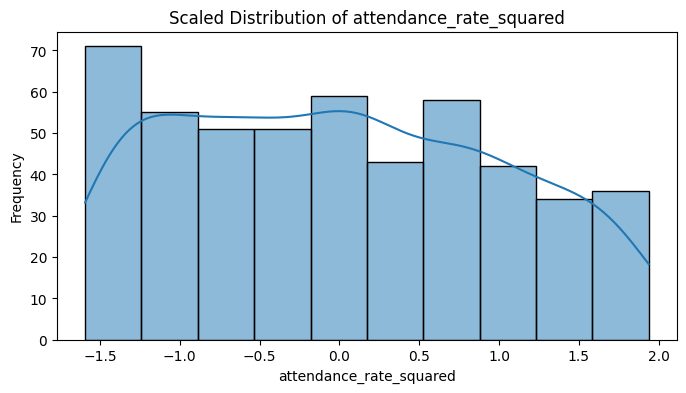

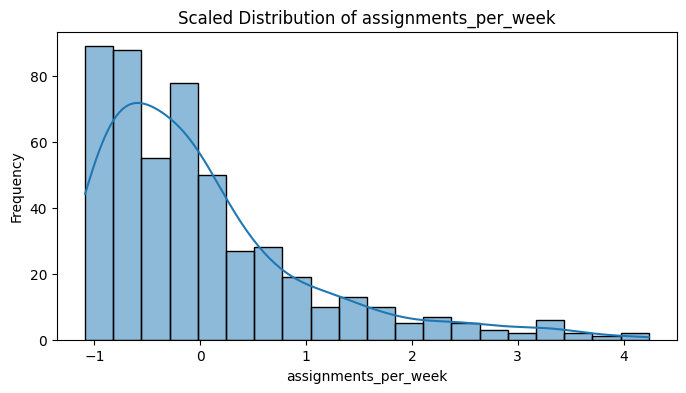

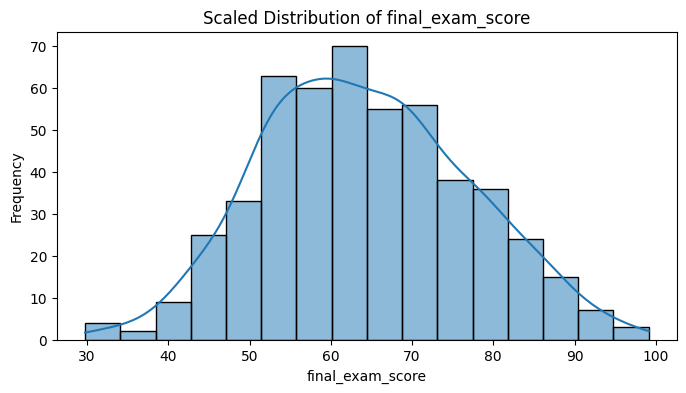

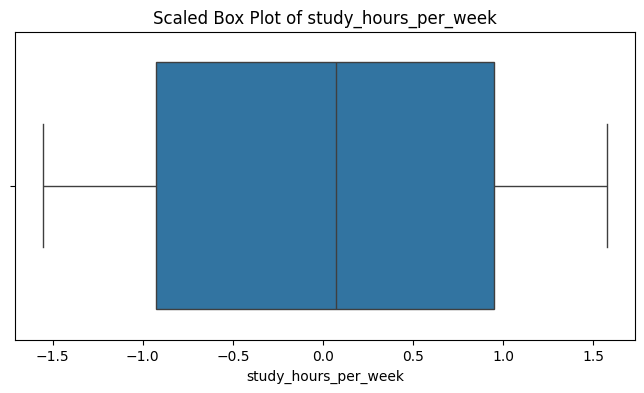

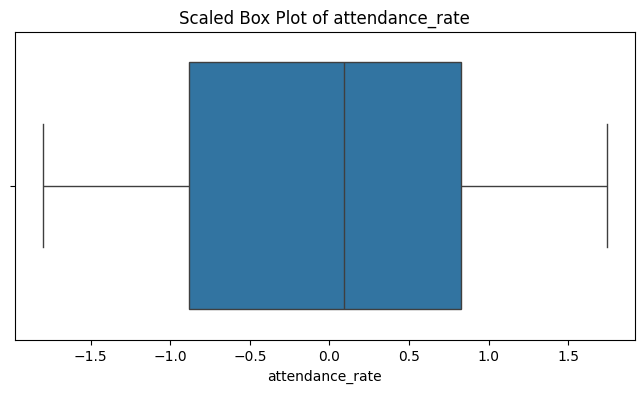

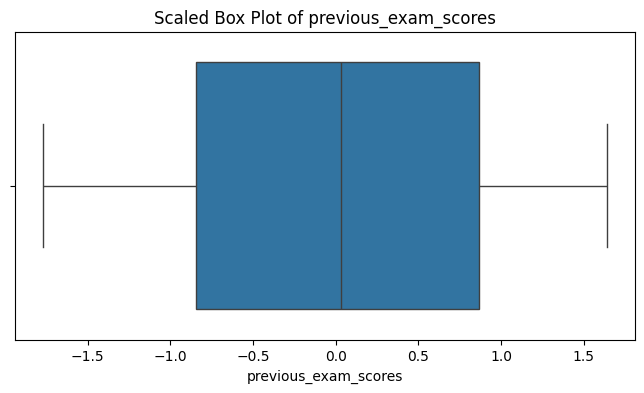

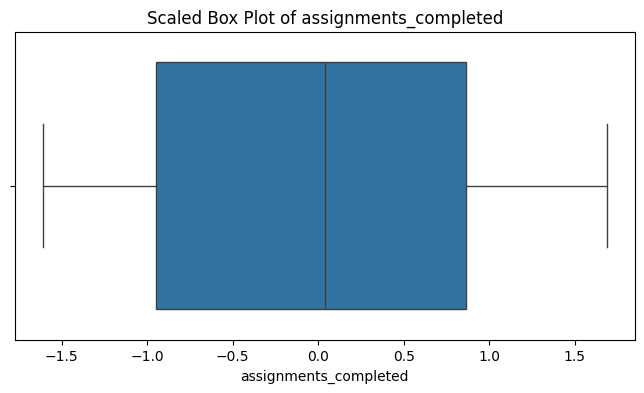

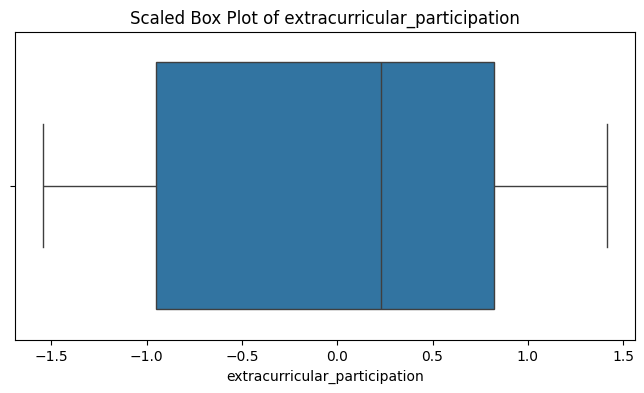

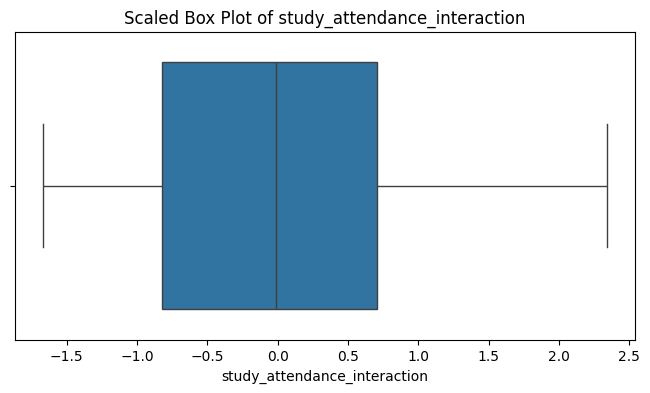

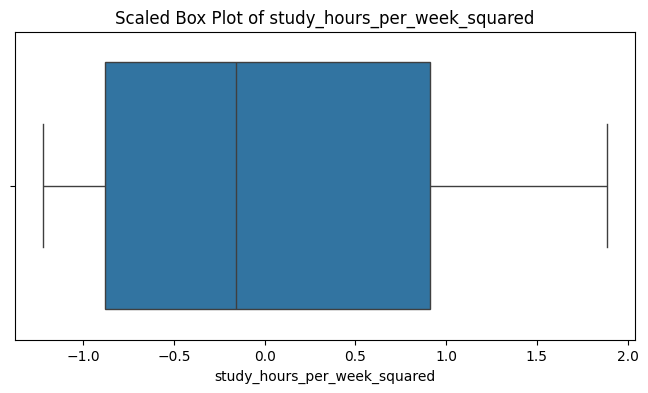

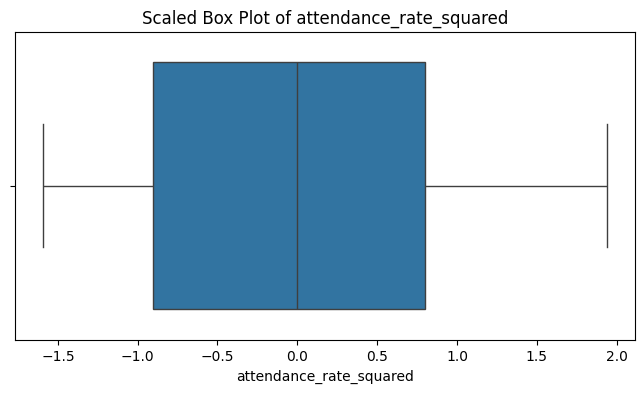

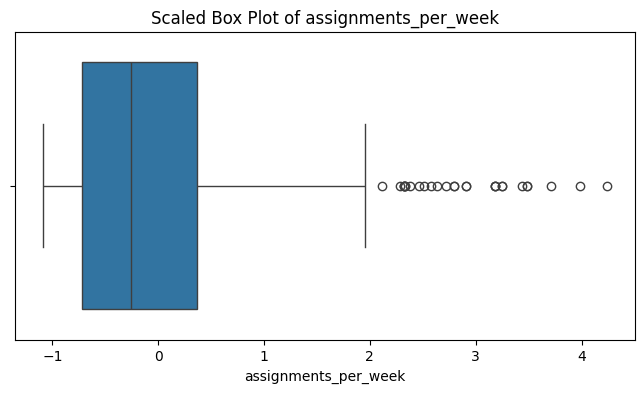

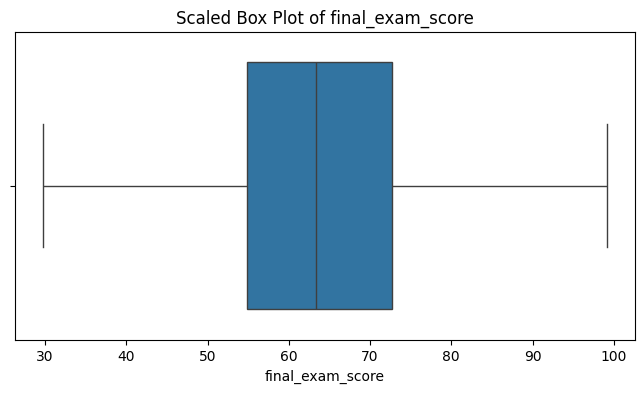

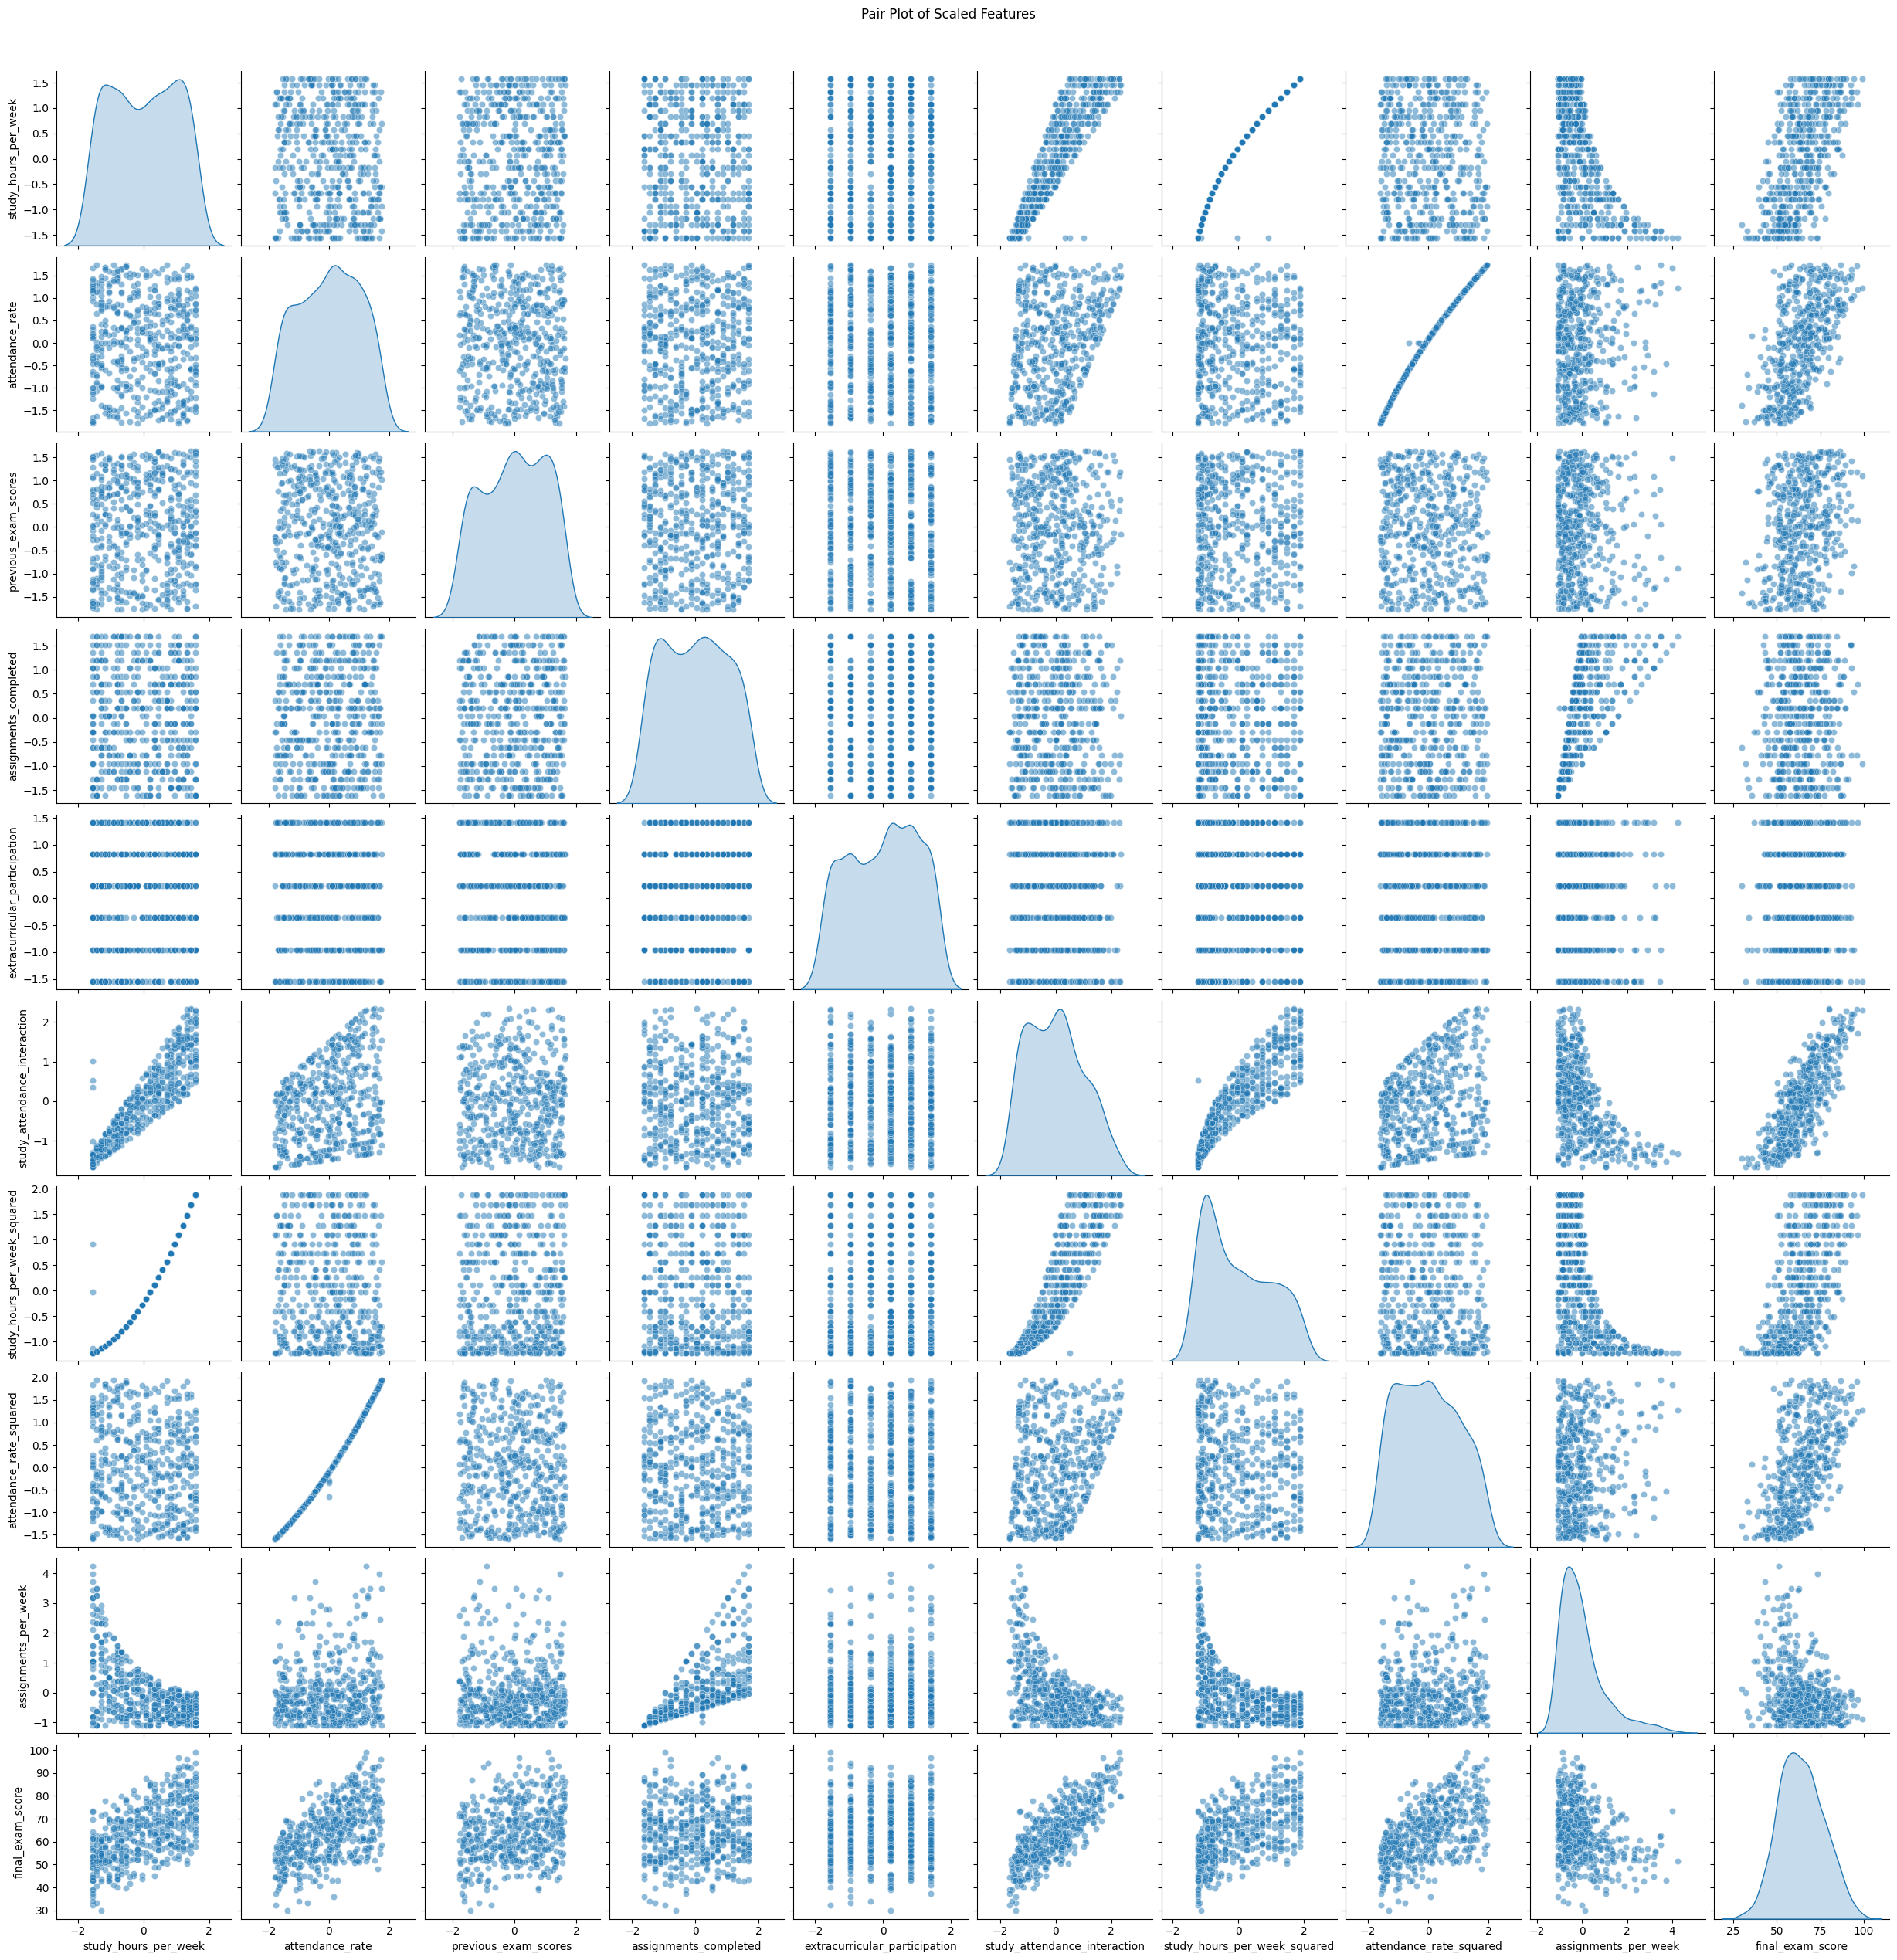

In [39]:
# Visualize the scaled data distributions
for column in scaled_data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(scaled_data[column], kde=True)
    plt.title(f'Scaled Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Box plots for each feature to observe spread and any remaining outliers
for column in scaled_data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=scaled_data[column])
    plt.title(f'Scaled Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

# Optional: Pair plot to observe pairwise relationships
sns.pairplot(scaled_data, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Scaled Features", y=1.02)
plt.show()

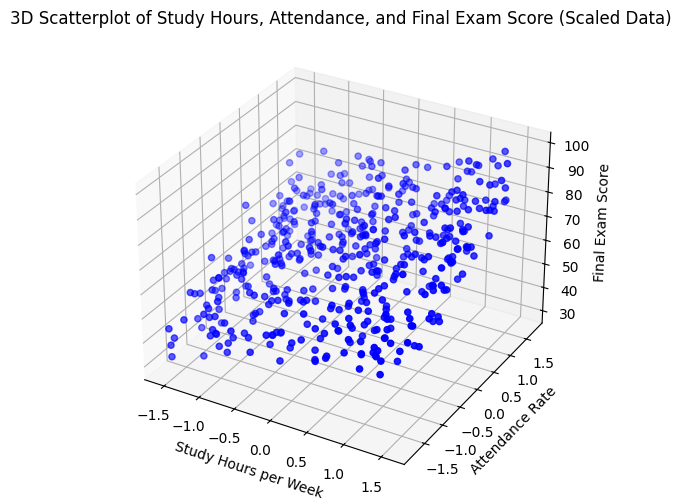

In [40]:
# 3D Scatterplot using scaled data: study_hours_per_week, attendance_rate, and final_exam_score
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_data['study_hours_per_week'], scaled_data['attendance_rate'], scaled_data['final_exam_score'], 
           c='blue', marker='o')
ax.set_xlabel('Study Hours per Week')
ax.set_ylabel('Attendance Rate')
ax.set_zlabel('Final Exam Score')
plt.title("3D Scatterplot of Study Hours, Attendance, and Final Exam Score (Scaled Data)")
plt.show()

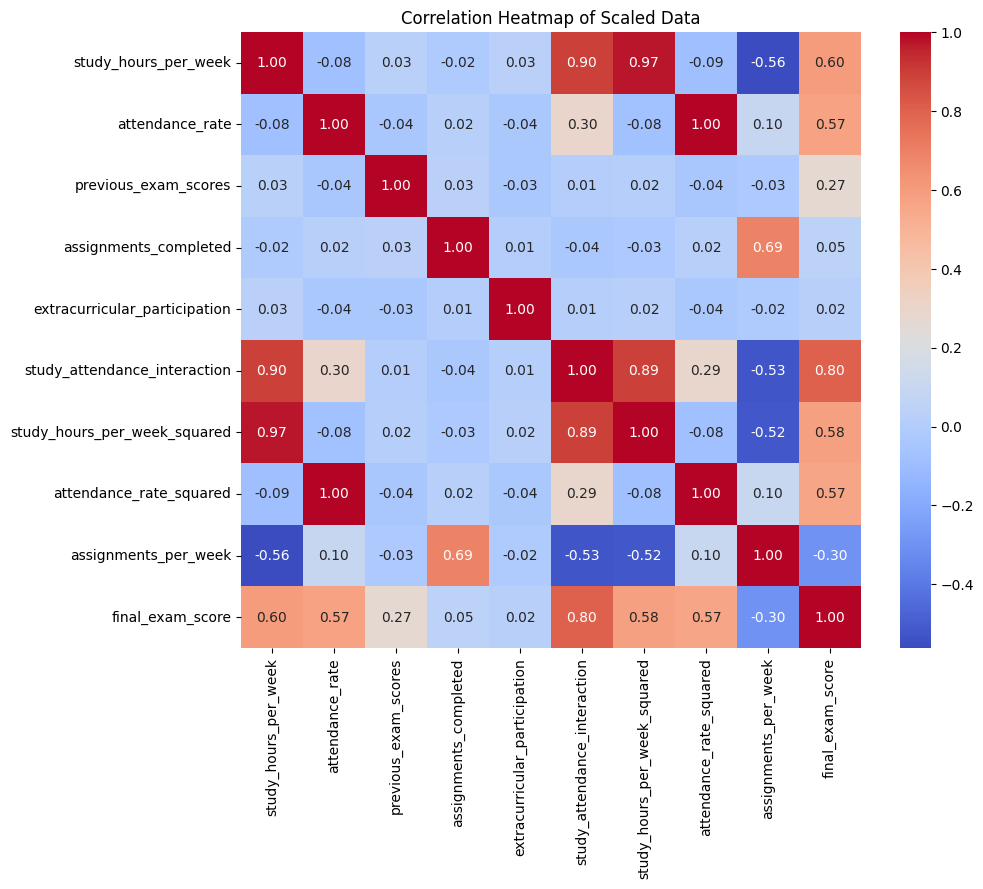

In [41]:
# Correlation Heatmap using scaled data
plt.figure(figsize=(10, 8))
correlation_matrix = scaled_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Scaled Data")
plt.show()

In [42]:
!pip install statsmodels



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:

# Multicollinearity Analysis: Calculate Variance Inflation Factor (VIF) for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = scaled_data.columns[:-1]  # Excluding the target variable
vif_data['VIF'] = [variance_inflation_factor(scaled_data.iloc[:, :-1].values, i) for i in range(scaled_data.shape[1] - 1)]
print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data)

Variance Inflation Factor (VIF) for each feature:
                         Feature         VIF
0           study_hours_per_week   31.071095
1                attendance_rate  121.566319
2           previous_exam_scores    1.013268
3          assignments_completed    3.726656
4  extracurricular_participation    1.004876
5   study_attendance_interaction   22.162317
6   study_hours_per_week_squared   26.410141
7        attendance_rate_squared  114.352177
8           assignments_per_week    5.887889


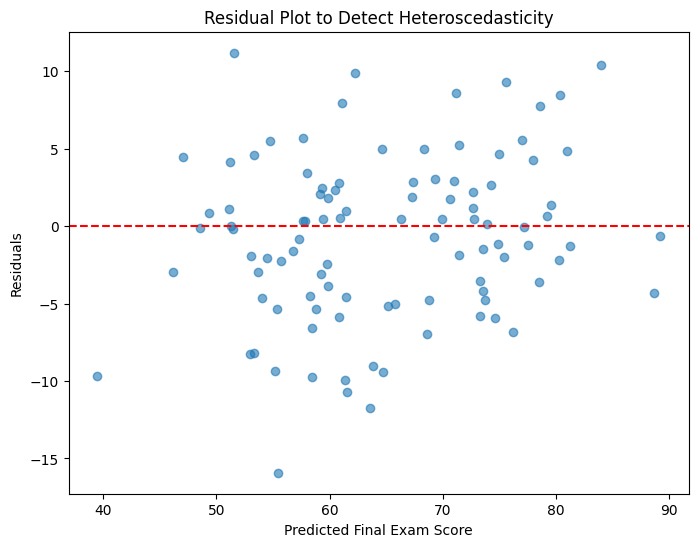

In [44]:
# Detect Heteroscedasticity: Fit Linear Regression Model and Plot Residuals
X = scaled_data.drop(columns=['final_exam_score'])
y = scaled_data['final_exam_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals against predicted values to detect heteroscedasticity
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Final Exam Score')
plt.ylabel('Residuals')
plt.title('Residual Plot to Detect Heteroscedasticity')
plt.show()


In [45]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

# Add a constant to the predictors for the intercept term
X_with_const = sm.add_constant(X_train)

# Fit a linear regression model
model = sm.OLS(y_train, X_with_const).fit()

# Perform White's test
white_test_results = het_white(model.resid, X_with_const)

# Extracting test statistic and p-value
test_statistic, test_statistic_p_value, _, _ = white_test_results

print("White Test for Heteroscedasticity:")
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {test_statistic_p_value}")

# Interpretation of results
if test_statistic_p_value < 0.05:
    print("The result is statistically significant; we reject the null hypothesis.")
    print("This suggests evidence of heteroscedasticity in the residuals.")
else:
    print("The result is not statistically significant; we fail to reject the null hypothesis.")
    print("This suggests no evidence of heteroscedasticity in the residuals.")

White Test for Heteroscedasticity:
Test Statistic: 45.1883931626206
P-value: 0.7978182213749369
The result is not statistically significant; we fail to reject the null hypothesis.
This suggests no evidence of heteroscedasticity in the residuals.


In [46]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('assgmt01_student_performance_dataset.csv')

# Handle Missing Values
for column in ['study_hours_per_week', 'assignments_completed', 'extracurricular_participation']:
    data[column].fillna(data[column].mode()[0], inplace=True)

for column in ['attendance_rate', 'previous_exam_scores']:
    data[column].fillna(data[column].mean(), inplace=True)

# Fill interaction terms
data['study_attendance_interaction'].fillna(data['study_hours_per_week'] * data['attendance_rate'], inplace=True)
data['study_hours_per_week_squared'].fillna(data['study_hours_per_week'] ** 2, inplace=True)
data['attendance_rate_squared'].fillna(data['attendance_rate'] ** 2, inplace=True)

# Separate Original and Engineered Feature Sets
original_features = ['study_hours_per_week', 'attendance_rate', 'previous_exam_scores',
                     'assignments_completed', 'extracurricular_participation']
all_features = data.columns.drop('final_exam_score')

# Define target variable
y = data['final_exam_score']

# Function to scale data
def scale_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Function to perform Lasso and Ridge with Cross-Validation, return results, and show selected features in Lasso
def evaluate_regularization(X_train, X_test, y_train, y_test, feature_names):
    # Define parameter grid for alpha tuning
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
    
    # Lasso Regression with Cross-Validation
    lasso = Lasso(max_iter=100000)
    lasso_cv = GridSearchCV(lasso, param_grid, cv=10, scoring='r2')
    lasso_cv.fit(X_train, y_train)
    lasso_best = lasso_cv.best_estimator_
    lasso_pred = lasso_best.predict(X_test)
    lasso_mse = mean_squared_error(y_test, lasso_pred)
    lasso_r2 = r2_score(y_test, lasso_pred)
    selected_features = feature_names[lasso_best.coef_ != 0]
    
    # Ridge Regression with Cross-Validation
    ridge = Ridge(max_iter=100000)
    ridge_cv = GridSearchCV(ridge, param_grid, cv=10, scoring='r2')
    ridge_cv.fit(X_train, y_train)
    ridge_best = ridge_cv.best_estimator_
    ridge_pred = ridge_best.predict(X_test)
    ridge_mse = mean_squared_error(y_test, ridge_pred)
    ridge_r2 = r2_score(y_test, ridge_pred)
    
    return {
        "Lasso": {"Best Alpha": lasso_cv.best_params_['alpha'], "MSE": lasso_mse, "R²": lasso_r2, "Selected Features": selected_features},
        "Ridge": {"Best Alpha": ridge_cv.best_params_['alpha'], "MSE": ridge_mse, "R²": ridge_r2}
    }

# Step 1: Baseline Model, Lasso, and Ridge using Original Features (Approach 1)
print("Approach 1: Using Original Features Only")

# Split data into training and testing sets
X_original = data[original_features]
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_original, y, test_size=0.4, random_state=42)

# Scale data
X_train_orig_scaled, X_test_orig_scaled = scale_data(X_train_orig, X_test_orig)

# Baseline Model
baseline_model_orig = LinearRegression()
baseline_model_orig.fit(X_train_orig_scaled, y_train)
baseline_pred_orig = baseline_model_orig.predict(X_test_orig_scaled)
baseline_mse_orig = mean_squared_error(y_test, baseline_pred_orig)
baseline_r2_orig = r2_score(y_test, baseline_pred_orig)

print("\nBaseline Model Performance (Original Features):")
print(f"Mean Squared Error: {baseline_mse_orig}")
print(f"R² Score: {baseline_r2_orig}")

# Lasso and Ridge on Original Features
results_orig = evaluate_regularization(X_train_orig_scaled, X_test_orig_scaled, y_train, y_test, feature_names=np.array(original_features))
print("\nLasso and Ridge Regression Performance (Original Features):")
print(results_orig)

# Step 2: Baseline Model, Lasso, and Ridge using All Features (Approach 2)
print("\nApproach 2: Using All Features (Including Engineered Features)")

# Split data into training and testing sets
X_all = data[all_features]
X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, y, test_size=0.4, random_state=42)

# Scale data
X_train_all_scaled, X_test_all_scaled = scale_data(X_train_all, X_test_all)

# Baseline Model with All Features
baseline_model_all = LinearRegression()
baseline_model_all.fit(X_train_all_scaled, y_train)
baseline_pred_all = baseline_model_all.predict(X_test_all_scaled)
baseline_mse_all = mean_squared_error(y_test, baseline_pred_all)
baseline_r2_all = r2_score(y_test, baseline_pred_all)

print("\nBaseline Model Performance (All Features):")
print(f"Mean Squared Error: {baseline_mse_all}")
print(f"R² Score: {baseline_r2_all}")

# Lasso and Ridge on All Features
results_all = evaluate_regularization(X_train_all_scaled, X_test_all_scaled, y_train, y_test, feature_names=np.array(all_features))
print("\nLasso and Ridge Regression Performance (All Features):")
print(results_all)

# Step 3: Remove Highly Correlated Features and Apply Regularization (Approach 3)
print("\nApproach 3: Remove Correlated Features and Apply Regularization")

# Define reduced feature set (excluding highly correlated engineered features)
reduced_features = ['previous_exam_scores', 'assignments_completed', 'extracurricular_participation', 'assignments_per_week']
X_reduced = data[reduced_features]

# Split data into training and testing sets for reduced features
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.4, random_state=42)

# Scale data
X_train_reduced_scaled, X_test_reduced_scaled = scale_data(X_train_reduced, X_test_reduced)

# Baseline Model with Reduced Features
baseline_model_reduced = LinearRegression()
baseline_model_reduced.fit(X_train_reduced_scaled, y_train)
baseline_pred_reduced = baseline_model_reduced.predict(X_test_reduced_scaled)
baseline_mse_reduced = mean_squared_error(y_test, baseline_pred_reduced)
baseline_r2_reduced = r2_score(y_test, baseline_pred_reduced)

print("\nBaseline Model Performance (Reduced Features):")
print(f"Mean Squared Error: {baseline_mse_reduced}")
print(f"R² Score: {baseline_r2_reduced}")

# Lasso and Ridge on Reduced Features
results_reduced = evaluate_regularization(X_train_reduced_scaled, X_test_reduced_scaled, y_train, y_test, feature_names=np.array(reduced_features))
print("\nLasso and Ridge Regression Performance (Reduced Features):")
print(results_reduced)

# Summary Comparison
print("\nSummary of Results:")

# Approach 1 - Original Features Only
print("\nApproach 1 - Original Features Only:")
print(f"Baseline Model: MSE = {baseline_mse_orig}, R² = {baseline_r2_orig}")
print(f"Lasso: Best Alpha = {results_orig['Lasso']['Best Alpha']}, MSE = {results_orig['Lasso']['MSE']}, R² = {results_orig['Lasso']['R²']}")
print(f"Ridge: Best Alpha = {results_orig['Ridge']['Best Alpha']}, MSE = {results_orig['Ridge']['MSE']}, R² = {results_orig['Ridge']['R²']}")

# Approach 2 - All Features (Including Engineered Features)
print("\nApproach 2 - All Features (Including Engineered Features):")
print(f"Baseline Model: MSE = {baseline_mse_all}, R² = {baseline_r2_all}")
print(f"Lasso: Best Alpha = {results_all['Lasso']['Best Alpha']}, MSE = {results_all['Lasso']['MSE']}, R² = {results_all['Lasso']['R²']}")
print(f"Ridge: Best Alpha = {results_all['Ridge']['Best Alpha']}, MSE = {results_all['Ridge']['MSE']}, R² = {results_all['Ridge']['R²']}")

# Approach 3 - Reduced Features After Removing Correlated Ones
print("\nApproach 3 - Reduced Features After Removing Correlated Ones:")
print(f"Baseline Model: MSE = {baseline_mse_reduced}, R² = {baseline_r2_reduced}")
print(f"Lasso: Best Alpha = {results_reduced['Lasso']['Best Alpha']}, MSE = {results_reduced['Lasso']['MSE']}, R² = {results_reduced['Lasso']['R²']}")
print(f"Ridge: Best Alpha = {results_reduced['Ridge']['Best Alpha']}, MSE = {results_reduced['Ridge']['MSE']}, R² = {results_reduced['Ridge']['R²']}")

# Selected Features by Lasso for Each Approach
print("\nSelected Features by Lasso for Each Approach:")

# Displaying selected features line by line for each approach
print("Approach 1 - Original Features Only:")
for feature in results_orig['Lasso']['Selected Features']:
    print(f"- {feature}")

print("\nApproach 2 - All Features (Including Engineered Features):")
for feature in results_all['Lasso']['Selected Features']:
    print(f"- {feature}")

print("\nApproach 3 - Reduced Features After Removing Correlated Ones:")
for feature in results_reduced['Lasso']['Selected Features']:
    print(f"- {feature}")



Approach 1: Using Original Features Only

Baseline Model Performance (Original Features):
Mean Squared Error: 26.533292213536345
R² Score: 0.830391510778945

Lasso and Ridge Regression Performance (Original Features):
{'Lasso': {'Best Alpha': 0.01, 'MSE': 26.53130674247796, 'R²': 0.8304042024850438, 'Selected Features': array(['study_hours_per_week', 'attendance_rate', 'previous_exam_scores',
       'assignments_completed', 'extracurricular_participation'],
      dtype='<U29')}, 'Ridge': {'Best Alpha': 1, 'MSE': 26.551893505851204, 'R²': 0.8302726059305874}}

Approach 2: Using All Features (Including Engineered Features)

Baseline Model Performance (All Features):
Mean Squared Error: 24.296978986866378
R² Score: 0.8446866726739719

Lasso and Ridge Regression Performance (All Features):
{'Lasso': {'Best Alpha': 0.1, 'MSE': 23.898532676732074, 'R²': 0.8472336568986851, 'Selected Features': array(['study_hours_per_week', 'attendance_rate', 'previous_exam_scores',
       'assignments_compl

In [47]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('assgmt01_student_performance_dataset.csv')

# Handle Missing Values
for column in ['study_hours_per_week', 'assignments_completed', 'extracurricular_participation']:
    data[column].fillna(data[column].mode()[0], inplace=True)

for column in ['attendance_rate', 'previous_exam_scores']:
    data[column].fillna(data[column].mean(), inplace=True)

# Fill interaction terms
data['study_attendance_interaction'].fillna(data['study_hours_per_week'] * data['attendance_rate'], inplace=True)
data['study_hours_per_week_squared'].fillna(data['study_hours_per_week'] ** 2, inplace=True)
data['attendance_rate_squared'].fillna(data['attendance_rate'] ** 2, inplace=True)

# Separate Original and Engineered Feature Sets
original_features = ['study_hours_per_week', 'attendance_rate', 'previous_exam_scores',
                     'assignments_completed', 'extracurricular_participation']
all_features = data.columns.drop('final_exam_score')

# Define target variable
y = data['final_exam_score']

# Function to scale data
def scale_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, scaler

# Function to perform Lasso and Ridge with Cross-Validation, return results, and show selected features in Lasso
def evaluate_regularization(X_train, X_test, y_train, y_test, feature_names):
    # Define parameter grid for alpha tuning
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
    
    # Lasso Regression with Cross-Validation
    lasso = Lasso(max_iter=100000)
    lasso_cv = GridSearchCV(lasso, param_grid, cv=10, scoring='r2')
    lasso_cv.fit(X_train, y_train)
    lasso_best = lasso_cv.best_estimator_
    lasso_pred = lasso_best.predict(X_test)
    lasso_mse = mean_squared_error(y_test, lasso_pred)
    lasso_r2 = r2_score(y_test, lasso_pred)
    selected_features = feature_names[lasso_best.coef_ != 0]
    
    # Ridge Regression with Cross-Validation
    ridge = Ridge(max_iter=100000)
    ridge_cv = GridSearchCV(ridge, param_grid, cv=10, scoring='r2')
    ridge_cv.fit(X_train, y_train)
    ridge_best = ridge_cv.best_estimator_
    ridge_pred = ridge_best.predict(X_test)
    ridge_mse = mean_squared_error(y_test, ridge_pred)
    ridge_r2 = r2_score(y_test, ridge_pred)
    
    return {
        "Lasso": {
            "Best Alpha": lasso_cv.best_params_['alpha'],
            "MSE": lasso_mse,
            "R²": lasso_r2,
            "Selected Features": selected_features,
            "Coefficients": pd.Series(lasso_best.coef_, index=feature_names)
        },
        "Ridge": {
            "Best Alpha": ridge_cv.best_params_['alpha'],
            "MSE": ridge_mse,
            "R²": ridge_r2
        }
    }

# Step 1: Baseline Model, Lasso, and Ridge using Original Features (Approach 1)
print("Approach 1: Using Original Features Only")

# Split data into training and testing sets
X_original = data[original_features]
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_original, y, test_size=0.4, random_state=42)

# Scale data
X_train_orig_scaled, X_test_orig_scaled, scaler_orig = scale_data(X_train_orig, X_test_orig)

# Baseline Model
baseline_model_orig = LinearRegression()
baseline_model_orig.fit(X_train_orig_scaled, y_train)
baseline_pred_orig = baseline_model_orig.predict(X_test_orig_scaled)
baseline_mse_orig = mean_squared_error(y_test, baseline_pred_orig)
baseline_r2_orig = r2_score(y_test, baseline_pred_orig)

print("\nBaseline Model Performance (Original Features):")
print(f"Mean Squared Error: {baseline_mse_orig}")
print(f"R² Score: {baseline_r2_orig}")

# Lasso and Ridge on Original Features
results_orig = evaluate_regularization(X_train_orig_scaled, X_test_orig_scaled, y_train, y_test, feature_names=np.array(original_features))
print("\nLasso and Ridge Regression Performance (Original Features):")
print(results_orig)

# Display Lasso coefficients for Approach 1
print("\nLasso Model Coefficients for Approach 1 - Original Features:")
print(results_orig["Lasso"]["Coefficients"])

# Step 2: Baseline Model, Lasso, and Ridge using All Features (Approach 2)
print("\nApproach 2: Using All Features (Including Engineered Features)")

# Split data into training and testing sets
X_all = data[all_features]
X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, y, test_size=0.4, random_state=42)

# Scale data
X_train_all_scaled, X_test_all_scaled, scaler_all = scale_data(X_train_all, X_test_all)

# Baseline Model with All Features
baseline_model_all = LinearRegression()
baseline_model_all.fit(X_train_all_scaled, y_train)
baseline_pred_all = baseline_model_all.predict(X_test_all_scaled)
baseline_mse_all = mean_squared_error(y_test, baseline_pred_all)
baseline_r2_all = r2_score(y_test, baseline_pred_all)

print("\nBaseline Model Performance (All Features):")
print(f"Mean Squared Error: {baseline_mse_all}")
print(f"R² Score: {baseline_r2_all}")

# Lasso and Ridge on All Features
results_all = evaluate_regularization(X_train_all_scaled, X_test_all_scaled, y_train, y_test, feature_names=np.array(all_features))
print("\nLasso and Ridge Regression Performance (All Features):")
print(results_all)

# Display Lasso coefficients for Approach 2
print("\nLasso Model Coefficients for Approach 2 - All Features:")
print(results_all["Lasso"]["Coefficients"])

# Step 3: Remove Highly Correlated Features and Apply Regularization (Approach 3)
print("\nApproach 3: Remove Correlated Features and Apply Regularization")

# Define reduced feature set (excluding highly correlated engineered features)
reduced_features = ['previous_exam_scores', 'assignments_completed', 'extracurricular_participation', 'assignments_per_week']
X_reduced = data[reduced_features]

# Split data into training and testing sets for reduced features
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.4, random_state=42)

# Scale data
X_train_reduced_scaled, X_test_reduced_scaled, scaler_reduced = scale_data(X_train_reduced, X_test_reduced)

# Baseline Model with Reduced Features
baseline_model_reduced = LinearRegression()
baseline_model_reduced.fit(X_train_reduced_scaled, y_train)
baseline_pred_reduced = baseline_model_reduced.predict(X_test_reduced_scaled)
baseline_mse_reduced = mean_squared_error(y_test, baseline_pred_reduced)
baseline_r2_reduced = r2_score(y_test, baseline_pred_reduced)

print("\nBaseline Model Performance (Reduced Features):")
print(f"Mean Squared Error: {baseline_mse_reduced}")
print(f"R² Score: {baseline_r2_reduced}")

# Lasso and Ridge on Reduced Features
results_reduced = evaluate_regularization(X_train_reduced_scaled, X_test_reduced_scaled, y_train, y_test, feature_names=np.array(reduced_features))
print("\nLasso and Ridge Regression Performance (Reduced Features):")
print(results_reduced)

# Display Lasso coefficients for Approach 3
print("\nLasso Model Coefficients for Approach 3 - Reduced Features:")
print(results_reduced["Lasso"]["Coefficients"])


Approach 1: Using Original Features Only

Baseline Model Performance (Original Features):
Mean Squared Error: 26.533292213536345
R² Score: 0.830391510778945

Lasso and Ridge Regression Performance (Original Features):
{'Lasso': {'Best Alpha': 0.01, 'MSE': 26.53130674247796, 'R²': 0.8304042024850438, 'Selected Features': array(['study_hours_per_week', 'attendance_rate', 'previous_exam_scores',
       'assignments_completed', 'extracurricular_participation'],
      dtype='<U29'), 'Coefficients': study_hours_per_week             7.955333
attendance_rate                  8.084850
previous_exam_scores             3.635958
assignments_completed            0.384403
extracurricular_participation    0.572128
dtype: float64}, 'Ridge': {'Best Alpha': 1, 'MSE': 26.551893505851204, 'R²': 0.8302726059305874}}

Lasso Model Coefficients for Approach 1 - Original Features:
study_hours_per_week             7.955333
attendance_rate                  8.084850
previous_exam_scores             3.635958
assig

In [48]:
# Summary of Results
print("\nSummary of Results:")

# Approach 1 - Original Features Only
print("\nApproach 1 - Original Features Only:")
print(f"Baseline Model: MSE = {baseline_mse_orig}, R² = {baseline_r2_orig}")
print(f"Lasso: Best Alpha = {results_orig['Lasso']['Best Alpha']}, MSE = {results_orig['Lasso']['MSE']}, R² = {results_orig['Lasso']['R²']}")
print("Lasso Selected Features and Coefficients:")
print(results_orig["Lasso"]["Coefficients"][results_orig["Lasso"]["Coefficients"] != 0])  # Display non-zero coefficients only
print(f"Ridge: Best Alpha = {results_orig['Ridge']['Best Alpha']}, MSE = {results_orig['Ridge']['MSE']}, R² = {results_orig['Ridge']['R²']}")

# Approach 2 - All Features (Including Engineered Features)
print("\nApproach 2 - All Features (Including Engineered Features):")
print(f"Baseline Model: MSE = {baseline_mse_all}, R² = {baseline_r2_all}")
print(f"Lasso: Best Alpha = {results_all['Lasso']['Best Alpha']}, MSE = {results_all['Lasso']['MSE']}, R² = {results_all['Lasso']['R²']}")
print("Lasso Selected Features and Coefficients:")
print(results_all["Lasso"]["Coefficients"][results_all["Lasso"]["Coefficients"] != 0])  # Display non-zero coefficients only
print(f"Ridge: Best Alpha = {results_all['Ridge']['Best Alpha']}, MSE = {results_all['Ridge']['MSE']}, R² = {results_all['Ridge']['R²']}")

# Approach 3 - Reduced Features After Removing Correlated Ones
print("\nApproach 3 - Reduced Features After Removing Correlated Ones:")
print(f"Baseline Model: MSE = {baseline_mse_reduced}, R² = {baseline_r2_reduced}")
print(f"Lasso: Best Alpha = {results_reduced['Lasso']['Best Alpha']}, MSE = {results_reduced['Lasso']['MSE']}, R² = {results_reduced['Lasso']['R²']}")
print("Lasso Selected Features and Coefficients:")
print(results_reduced["Lasso"]["Coefficients"][results_reduced["Lasso"]["Coefficients"] != 0])  # Display non-zero coefficients only
print(f"Ridge: Best Alpha = {results_reduced['Ridge']['Best Alpha']}, MSE = {results_reduced['Ridge']['MSE']}, R² = {results_reduced['Ridge']['R²']}")

# Summary Explanation
print("\nSummary Explanation:")
print("The summary shows the performance (MSE and R²) of each model (Baseline, Lasso, and Ridge) for the three different approaches. "
      "For Lasso, it also displays the selected features with non-zero coefficients, which helps in understanding feature importance in each approach.")



Summary of Results:

Approach 1 - Original Features Only:
Baseline Model: MSE = 26.533292213536345, R² = 0.830391510778945
Lasso: Best Alpha = 0.01, MSE = 26.53130674247796, R² = 0.8304042024850438
Lasso Selected Features and Coefficients:
study_hours_per_week             7.955333
attendance_rate                  8.084850
previous_exam_scores             3.635958
assignments_completed            0.384403
extracurricular_participation    0.572128
dtype: float64
Ridge: Best Alpha = 1, MSE = 26.551893505851204, R² = 0.8302726059305874

Approach 2 - All Features (Including Engineered Features):
Baseline Model: MSE = 24.296978986866378, R² = 0.8446866726739719
Lasso: Best Alpha = 0.1, MSE = 23.898532676732074, R² = 0.8472336568986851
Lasso Selected Features and Coefficients:
study_hours_per_week             0.095688
attendance_rate                  3.047067
previous_exam_scores             3.523580
assignments_completed            0.500405
extracurricular_participation    0.478597
study_at

In [49]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import pickle

# Load and prepare the dataset
data = pd.read_csv('assgmt01_student_performance_dataset.csv')

# Handle missing values
for column in ['study_hours_per_week', 'assignments_completed', 'extracurricular_participation']:
    data[column].fillna(data[column].mode()[0], inplace=True)
for column in ['attendance_rate', 'previous_exam_scores']:
    data[column].fillna(data[column].mean(), inplace=True)
data['study_attendance_interaction'].fillna(data['study_hours_per_week'] * data['attendance_rate'], inplace=True)
data['study_hours_per_week_squared'].fillna(data['study_hours_per_week'] ** 2, inplace=True)
data['attendance_rate_squared'].fillna(data['attendance_rate'] ** 2, inplace=True)

# Separate features and target
X = data[['study_hours_per_week', 'attendance_rate', 'previous_exam_scores', 'assignments_completed',
          'extracurricular_participation', 'study_attendance_interaction', 'study_hours_per_week_squared',
          'attendance_rate_squared']]
y = data['final_exam_score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Lasso with cross-validation to find the best alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso = Lasso(max_iter=100000)
lasso_cv = GridSearchCV(lasso, param_grid, cv=10, scoring='r2')
lasso_cv.fit(X_train_scaled, y_train)

# Get the best model
best_lasso = lasso_cv.best_estimator_

# Save the model and scaler to disk
with open('best_lasso_model.pkl', 'wb') as f:
    pickle.dump(best_lasso, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model and scaler saved!")


Model and scaler saved!
